c:\users\валерия смелова\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
c:\users\валерия смелова\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


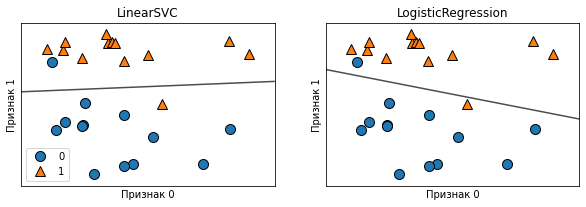

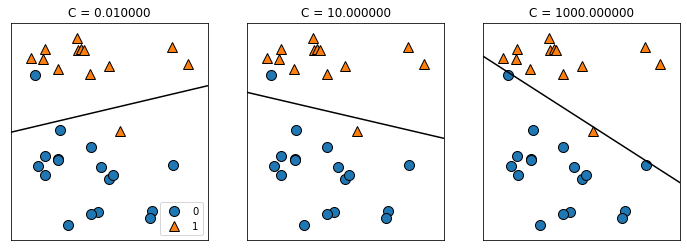

c:\users\валерия смелова\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\валерия смелова\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

Недообучение
Правильность на обучающем наборе C=1: 0.944
Правильность на тестовом наборе C=1: 0.958
Сложная модель
Правильность на обучающем наборе C=100: 0.948
Правильность на тестовом наборе C=100: 0.958
Простая модель
Правильность на обучающем наборе С=0.01: 0.934
Правильность на тестовом наборе С=0.01: 0.930


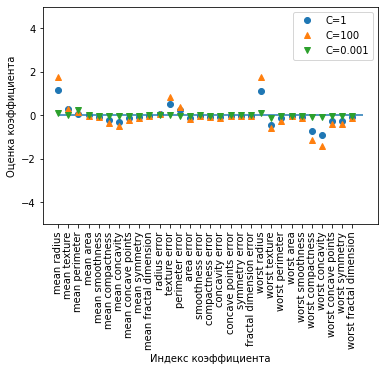

Правильность на обучении для логрегрессии l1 с C=0.001: 0.91
Правильность на тесте для логрегрессии l1 с C=0.001: 0.92


c:\users\валерия смелова\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Правильность на обучении для логрегрессии l1 с C=1.000: 0.96
Правильность на тесте для логрегрессии l1 с C=1.000: 0.96
Правильность на обучении для логрегрессии l1 с C=100.000: 0.99
Правильность на тесте для логрегрессии l1 с C=100.000: 0.98


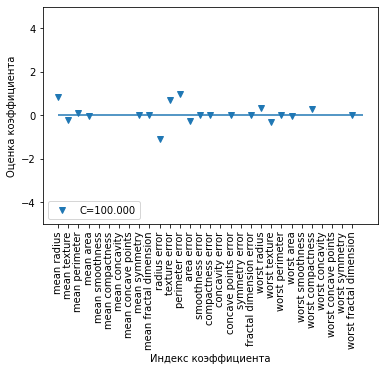

In [17]:
import mglearn
import sklearn
import matplotlib.pyplot as plt

#показываем два алгоритма на одном наборе forge
#L2 регуляризация чем больше коэф, тем больше веса
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
axes[0].legend()
plt.show()
#смотрим как параметр C влияет на обобщающую способность модели
#чем меньше С, тем меньше веса - подстраиваемся под большинство
#большое С - алгоритм пытается классифицировать каждую точку правильно
#слева слишком регулязирована
#справа мало регуляризована - переобучена на обучающем наборе
mglearn.plots.plot_linear_svc_regularization()
plt.show()

#логистическая регрессия на наборе breast cancer
#С =1, результаты неплохие, но скорее всего недообучили
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Недообучение")
print("Правильность на обучающем наборе C=1: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе C=1: {:.3f}".format(logreg.score(X_test, y_test)))

#увеличим С, чтобы алгоритм старался учесть каждую точку с ее признаками
#более сложная модель лучше работает

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Сложная модель")
print("Правильность на обучающем наборе C=100: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Правильность на тестовом наборе C=100: {:.3f}".format(logreg100.score(X_test, y_test)))

#упростим модель, поставив С=0.01
#будем подстраиваться под большинство точек
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Простая модель")
print("Правильность на обучающем наборе С=0.01: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Правильность на тестовом наборе С=0.01: {:.3f}".format(logreg001.score(X_test, y_test)))

#посмотрим, как С влияет на вычисление весов
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()
plt.show()

#попробуем L1 регуляризацию - когда некоторые признаки убираются
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1',solver='liblinear').fit(X_train, y_train)
    #lr_l1.set_params(C=c)
    print("Правильность на обучении для логрегрессии l1 с C={:.3f}: {:.2f}".format( C, lr_l1.score(X_train, y_train)))
    print("Правильность на тесте для логрегрессии l1 с C={:.3f}: {:.2f}".format( C, lr_l1.score(X_test, y_test)))
    
#чем больше С - тем сложнее становится моделька
plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()    